# # # #  **Kütüphanelerin Yüklenmesi**

In [39]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np
import matplotlib.pyplot as plt

# 1. Girdi ve çıktı değişkenlerini tanımlanması

In [40]:
film_turu = ctrl.Antecedent(np.arange(0, 11, 1), 'Film Türü')
yayin_platformu = ctrl.Antecedent(np.arange(0, 11, 1), 'Yayın Platformu')
oyuncu_kadrosu = ctrl.Antecedent(np.arange(0, 101, 1), 'Oyuncu Kadrosu')
yonetmen_puani = ctrl.Antecedent(np.arange(0, 11, 1), 'Yönetmen Puanı')
yayin_yili = ctrl.Antecedent(np.arange(1900, 2023, 1), 'Yayın Yılı')
izlenme_sayisi = ctrl.Consequent(np.arange(0, 1000001, 1), 'İzlenme Sayısı')

# 2. Üyelik fonksiyonlarını tanımlanması

In [41]:

film_turu['Komedi'] = fuzz.trimf(film_turu.universe, [0, 0, 5])
film_turu['Aksiyon'] = fuzz.trimf(film_turu.universe, [2, 5, 8])
film_turu['Drama'] = fuzz.trimf(film_turu.universe, [5, 10, 10])

yayin_platformu['Netflix'] = fuzz.trimf(yayin_platformu.universe, [0, 0, 5])
yayin_platformu['TV+'] = fuzz.trimf(yayin_platformu.universe, [2, 5, 8])
yayin_platformu['Gain'] = fuzz.trimf(yayin_platformu.universe, [5, 10, 10])

oyuncu_kadrosu['Kötü'] = fuzz.trimf(oyuncu_kadrosu.universe, [0, 0, 50])
oyuncu_kadrosu['Orta'] = fuzz.trimf(oyuncu_kadrosu.universe, [40, 50, 60])
oyuncu_kadrosu['İyi'] = fuzz.trimf(oyuncu_kadrosu.universe, [50, 100, 100])

yonetmen_puani['Düşük'] = fuzz.trimf(yonetmen_puani.universe, [0, 0, 5])
yonetmen_puani['Orta'] = fuzz.trimf(yonetmen_puani.universe, [4, 5, 7])
yonetmen_puani['Yüksek'] = fuzz.trimf(yonetmen_puani.universe, [6, 10, 10])

yayin_yili['Eski Dönem'] = fuzz.trimf(yayin_yili.universe, [1900, 1900, 1970])
yayin_yili['Orta Dönem'] = fuzz.trimf(yayin_yili.universe, [1960, 2000, 2020])
yayin_yili['Yeni Dönem'] = fuzz.trimf(yayin_yili.universe, [2010, 2023, 2023])

# 3. Çıktı Değişkeninin Tanımlanması

In [42]:
# Diğer üyelik fonksiyonlarını da tanımlayın
izlenme_sayisi['Az Seyredilmiş'] = fuzz.trimf(izlenme_sayisi.universe, [0, 0, 50000])
izlenme_sayisi['Orta Seyredilmiş'] = fuzz.trimf(izlenme_sayisi.universe, [40000, 50000, 60000])
izlenme_sayisi['Gişe Rekortmeni'] = fuzz.trimf(izlenme_sayisi.universe, [55000, 1000000, 1000000])

# 4. Kural Tabanının Oluşturulması

In [43]:

kurallar = [
    ctrl.Rule(film_turu['Komedi'] & yayin_platformu['Netflix'] & oyuncu_kadrosu['İyi'] & yonetmen_puani['Yüksek'] & yayin_yili['Yeni Dönem'], izlenme_sayisi['Gişe Rekortmeni']),
    ctrl.Rule(film_turu['Aksiyon'] & yayin_platformu['Netflix'] & oyuncu_kadrosu['İyi'] & yonetmen_puani['Yüksek'] & yayin_yili['Yeni Dönem'], izlenme_sayisi['Gişe Rekortmeni']),
    ctrl.Rule(film_turu['Drama'] & yayin_platformu['Netflix'] & oyuncu_kadrosu['İyi'] & yonetmen_puani['Yüksek'] & yayin_yili['Yeni Dönem'], izlenme_sayisi['Gişe Rekortmeni']),
    ctrl.Rule(film_turu['Komedi'] & yayin_platformu['Netflix'] & oyuncu_kadrosu['Orta'] & yonetmen_puani['Yüksek'] & yayin_yili['Eski Dönem'], izlenme_sayisi['Orta Seyredilmiş']),
    ctrl.Rule(film_turu['Aksiyon'] & yayin_platformu['TV+'] & oyuncu_kadrosu['Orta'] & yonetmen_puani['Yüksek'] & yayin_yili['Eski Dönem'], izlenme_sayisi['Orta Seyredilmiş']),
    ctrl.Rule(film_turu['Drama'] & yayin_platformu['TV+'] & oyuncu_kadrosu['Orta'] & yonetmen_puani['Yüksek'] & yayin_yili['Eski Dönem'], izlenme_sayisi['Orta Seyredilmiş']),
    ctrl.Rule(film_turu['Aksiyon'] & yayin_platformu['Gain'] & oyuncu_kadrosu['Kötü'] & yonetmen_puani['Düşük'] & yayin_yili['Eski Dönem'], izlenme_sayisi['Az Seyredilmiş']),
    ctrl.Rule(film_turu['Drama'] & yayin_platformu['Gain'] & oyuncu_kadrosu['Kötü'] & yonetmen_puani['Düşük'] & yayin_yili['Eski Dönem'], izlenme_sayisi['Az Seyredilmiş']),
    ctrl.Rule(film_turu['Aksiyon'] & yayin_platformu['Gain'] & oyuncu_kadrosu['Orta'] & yonetmen_puani['Orta'] & yayin_yili['Orta Dönem'], izlenme_sayisi['Orta Seyredilmiş']),
    ctrl.Rule(film_turu['Drama'] & yayin_platformu['Gain'] & oyuncu_kadrosu['Orta'] & yonetmen_puani['Orta'] & yayin_yili['Orta Dönem'], izlenme_sayisi['Orta Seyredilmiş']),
    ctrl.Rule(film_turu['Komedi'] & yayin_platformu['Gain'] & oyuncu_kadrosu['Orta'] & yonetmen_puani['Orta'] & yayin_yili['Orta Dönem'], izlenme_sayisi['Orta Seyredilmiş']),
    ctrl.Rule(film_turu['Aksiyon'] & yayin_platformu['TV+'] & oyuncu_kadrosu['İyi'] & yonetmen_puani['Orta'] & yayin_yili['Orta Dönem'], izlenme_sayisi['Orta Seyredilmiş']),
    ctrl.Rule(film_turu['Drama'] & yayin_platformu['TV+'] & oyuncu_kadrosu['İyi'] & yonetmen_puani['Orta'] & yayin_yili['Orta Dönem'], izlenme_sayisi['Orta Seyredilmiş']),
    ctrl.Rule(film_turu['Komedi'] & yayin_platformu['TV+'] & oyuncu_kadrosu['İyi'] & yonetmen_puani['Orta'] & yayin_yili['Orta Dönem'], izlenme_sayisi['Orta Seyredilmiş']),
    ctrl.Rule(film_turu['Aksiyon'] & yayin_platformu['Gain'] & oyuncu_kadrosu['İyi'] & yonetmen_puani['Yüksek'] & yayin_yili['Yeni Dönem'], izlenme_sayisi['Gişe Rekortmeni']),
    ctrl.Rule(film_turu['Drama'] & yayin_platformu['Gain'] & oyuncu_kadrosu['İyi'] & yonetmen_puani['Yüksek'] & yayin_yili['Yeni Dönem'], izlenme_sayisi['Gişe Rekortmeni']),
    ctrl.Rule(film_turu['Komedi'] & yayin_platformu['TV+'] & oyuncu_kadrosu['İyi'] & yonetmen_puani['Yüksek'] & yayin_yili['Yeni Dönem'], izlenme_sayisi['Gişe Rekortmeni']),
    ctrl.Rule(film_turu['Aksiyon'] & yayin_platformu['Gain'] & oyuncu_kadrosu['İyi'] & yonetmen_puani['Yüksek'] & yayin_yili['Yeni Dönem'], izlenme_sayisi['Gişe Rekortmeni']),
    ctrl.Rule(film_turu['Drama'] & yayin_platformu['Gain'] & oyuncu_kadrosu['İyi'] & yonetmen_puani['Yüksek'] & yayin_yili['Yeni Dönem'], izlenme_sayisi['Gişe Rekortmeni'])
]

# 5. Fuzzy Inference System(FIS)'in oluşturulması

In [44]:
fis = ctrl.ControlSystem(kurallar)

# 6. Girdilerin ve Çıktıların Belirlenmesi

In [45]:
film_izlenme_sim = ctrl.ControlSystemSimulation(fis)

# 7. Girdilere Örnek Değerleri Atama ve FIS'i Çalıştırma

In [46]:
film_izlenme_sim.input['Film Türü'] = 5
film_izlenme_sim.input['Yayın Platformu'] = 7
film_izlenme_sim.input['Oyuncu Kadrosu'] = 90
film_izlenme_sim.input['Yönetmen Puanı'] = 9
film_izlenme_sim.input['Yayın Yılı'] = 2020
film_izlenme_sim.compute()

# 8. Sonucun Ekrana Yazdırılması

In [47]:

print(film_izlenme_sim.output['İzlenme Sayısı'])

614125.0000007538


# 9.Çıktı Değişken ile Grafiğin Oluşturulması 

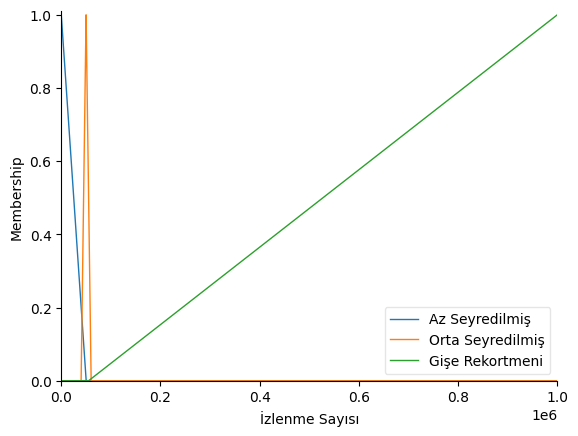

In [48]:
izlenme_sayisi.view()

plt.show()

# İrfan Yakut
# 2023900092@ogr.deu.edu.tr